In [1]:
# import dependencies
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# read first csv file
file1 = "Resources\Crime_Data_from_2010_to_2019.csv"
la_crime1 = pd.read_csv(file1, encoding="utf-8")
la_crime1 = la_crime1[1672533: ] # selecting only 2018 and 2019 data
la_crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447264 entries, 1672533 to 2119796
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           447264 non-null  int64  
 1   Date Rptd       447264 non-null  object 
 2   DATE OCC        447264 non-null  object 
 3   TIME OCC        447264 non-null  int64  
 4   AREA            447264 non-null  int64  
 5   AREA NAME       447264 non-null  object 
 6   Rpt Dist No     447264 non-null  int64  
 7   Part 1-2        447264 non-null  int64  
 8   Crm Cd          447264 non-null  int64  
 9   Crm Cd Desc     447264 non-null  object 
 10  Mocodes         402618 non-null  object 
 11  Vict Age        447264 non-null  int64  
 12  Vict Sex        406325 non-null  object 
 13  Vict Descent    406315 non-null  object 
 14  Premis Cd       447256 non-null  float64
 15  Premis Desc     447125 non-null  object 
 16  Weapon Used Cd  158490 non-null  float64
 17  Wea

In [3]:
# read second csv file
file2 = "Resources\Crime_Data_from_2020_to_Present.csv"
la_crime2 = pd.read_csv(file2, encoding="utf-8")
la_crime2 = la_crime2[: 640388] # selecting 2020-2022 data
la_crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640388 entries, 0 to 640387
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           640388 non-null  int64  
 1   Date Rptd       640388 non-null  object 
 2   DATE OCC        640388 non-null  object 
 3   TIME OCC        640388 non-null  int64  
 4   AREA            640388 non-null  int64  
 5   AREA NAME       640388 non-null  object 
 6   Rpt Dist No     640388 non-null  int64  
 7   Part 1-2        640388 non-null  int64  
 8   Crm Cd          640388 non-null  int64  
 9   Crm Cd Desc     640388 non-null  object 
 10  Mocodes         552367 non-null  object 
 11  Vict Age        640388 non-null  int64  
 12  Vict Sex        556682 non-null  object 
 13  Vict Descent    556678 non-null  object 
 14  Premis Cd       640380 non-null  float64
 15  Premis Desc     640082 non-null  object 
 16  Weapon Used Cd  223726 non-null  float64
 17  Weapon Des

In [4]:
# Getting columns names
la_crime1.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
# Getting column names and comparing to first set 
la_crime2.columns
# Note that the area var as a trailing space

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
# selecting only the variables of interest
la_crime1 = la_crime1[['DR_NO', 'DATE OCC', 'AREA ', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 
                       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
                       'Weapon Used Cd', 'Weapon Desc', 'LAT','LON']]
la_crime2 = la_crime2[['DR_NO', 'DATE OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 
                       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
                       'Weapon Used Cd', 'Weapon Desc', 'LAT','LON']]
la_crime2.head()

,DR_NO,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0141,-118.2978
1,190101086,01/01/2020 12:00:00 AM,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,34.0459,-118.2545
2,200110444,02/13/2020 12:00:00 AM,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,NaN,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,34.2198,-118.4468


In [7]:
#The column Area for the first set has a space, so needs to change it to be the same as the second set
la_crime1 = la_crime1.rename(columns={"AREA ": "AREA"})
la_crime1.head()

,DR_NO,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LAT,LON
1672533,180512192,06/20/2018 12:00:00 AM,5,Harbor,626,INTIMATE PARTNER - SIMPLE ASSAULT,40,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",33.7932,-118.2648
1672534,181211151,04/08/2018 12:00:00 AM,12,77th Street,624,BATTERY - SIMPLE ASSAULT,60,F,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",33.9891,-118.3167
1672535,180220154,09/29/2018 12:00:00 AM,2,Rampart,624,BATTERY - SIMPLE ASSAULT,61,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0529,-118.2733
1672536,190909830,10/31/2018 12:00:00 AM,9,Van Nuys,440,THEFT PLAIN - PETTY ($950 & UNDER),36,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,34.1867,-118.4181
1672537,181113371,07/09/2018 12:00:00 AM,11,Northeast,440,THEFT PLAIN - PETTY ($950 & UNDER),73,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,34.1008,-118.2665


In [8]:
# Recode date variable

# convert the date column to datetime format
la_crime1['date'] = pd.to_datetime(la_crime1['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
la_crime2['date'] = pd.to_datetime(la_crime2['DATE OCC'], infer_datetime_format=True)

In [9]:
# Merging the two sets
la_crime = concatenated_df = pd.concat([la_crime1, la_crime2], axis=0, ignore_index=True)
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087652 entries, 0 to 1087651
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1087652 non-null  int64         
 1   DATE OCC        1087652 non-null  object        
 2   AREA            1087652 non-null  int64         
 3   AREA NAME       1087652 non-null  object        
 4   Crm Cd          1087652 non-null  int64         
 5   Crm Cd Desc     1087652 non-null  object        
 6   Vict Age        1087652 non-null  int64         
 7   Vict Sex        963007 non-null   object        
 8   Vict Descent    962993 non-null   object        
 9   Premis Cd       1087636 non-null  float64       
 10  Premis Desc     1087207 non-null  object        
 11  Weapon Used Cd  382216 non-null   float64       
 12  Weapon Desc     382216 non-null   object        
 13  LAT             1087652 non-null  float64       
 14  LON             10

In [10]:
# check values of VICTIM variables
print("Victim Age") # Looks like some data points are inaccurate (e.g., is age 0 a baby or missing value?)
print("-" * 30)
print(la_crime["Vict Age"].value_counts())  
print("*" * 74)
print("Victim Gender") # Need to figure out what are Xs and what are Hs
print("-" * 30)
print(la_crime["Vict Sex"].value_counts())
print("*" * 74)
print("Victim Ethnicity") # Need to figure out all the codes
print("-" * 30)
print(la_crime["Vict Descent"].value_counts())
print("*" * 74)

Victim Age
------------------------------
 0      238618
 30      24732
 29      24099
 28      24071
 35      23806
         ...  
-2          17
-3           2
-4           1
 120         1
 118         1
Name: Vict Age, Length: 105, dtype: int64
**************************************************************************
Victim Gender
------------------------------
M    466761
F    416318
X     79819
H        92
N        17
Name: Vict Sex, dtype: int64
**************************************************************************
Victim Ethnicity
------------------------------
H    344893
W    233410
B    161026
O     92751
X     90526
A     25870
K      5037
F      3191
C      2718
J      1021
I       839
V       745
Z       383
P       226
U       157
G        63
D        52
L        44
S        39
-         2
Name: Vict Descent, dtype: int64
**************************************************************************


In [11]:
# Filtering the data by valid Gender
la_crime = la_crime.loc[(la_crime["Vict Sex"] == 'F') | (la_crime["Vict Sex"] == 'M'), :]
# Filtering the data by valid Age 
la_crime = la_crime.loc[(la_crime['Vict Age'] > 0) & (la_crime["Vict Age"] <= 90), :]
temp = la_crime.loc[la_crime["Vict Age"] < 10 , :]
temp['Crm Cd Desc'].value_counts()

CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                     1561
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)     905
CHILD NEGLECT (SEE 300 W.I.C.)                               739
BATTERY - SIMPLE ASSAULT                                     356
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               292
                                                            ... 
BOMB SCARE                                                     1
THREATENING PHONE CALLS/LETTERS                                1
BURGLARY, ATTEMPTED                                            1
DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER           1
BURGLARY FROM VEHICLE, ATTEMPTED                               1
Name: Crm Cd Desc, Length: 70, dtype: int64

In [12]:
# check values of AREA variables
print("Area Code") # use as primary key for LA Area table, keep as forign key in Crimes table
print("-" * 30)
print(la_crime["AREA"].value_counts())
print("*" * 74)
print("LA Area Name") # use in LA Area table
print("-" * 30)
print(la_crime["AREA NAME"].value_counts())
print("*" * 74)

Area Code
------------------------------
1     56628
12    54851
3     49523
14    46221
6     44229
18    43793
15    41765
7     41266
21    40934
20    40185
13    38658
9     38208
8     38198
2     37210
19    35654
11    34456
10    34163
17    32472
5     31618
16    29272
4     29082
Name: AREA, dtype: int64
**************************************************************************
LA Area Name
------------------------------
Central        56628
77th Street    54851
Southwest      49523
Pacific        46221
Hollywood      44229
Southeast      43793
N Hollywood    41765
Wilshire       41266
Topanga        40934
Olympic        40185
Newton         38658
Van Nuys       38208
West LA        38198
Rampart        37210
Mission        35654
Northeast      34456
West Valley    34163
Devonshire     32472
Harbor         31618
Foothill       29272
Hollenbeck     29082
Name: AREA NAME, dtype: int64
**************************************************************************


In [13]:
# check values of CRIME TYPE variables
print("Crime Code") # use as primary key for Crime Type table, keep as forign key in Crimes table
print("-" * 30)
print(la_crime["Crm Cd"].value_counts().head(20)) 
print("*" * 74)
print("Crime Code Description") # use in Crime Type table (pick only top 20 crimes)
print("-" * 30)
print(la_crime["Crm Cd Desc"].value_counts().head(20)) 
print("*" * 74)

Crime Code
------------------------------
624    87388
330    72949
354    59515
626    56652
230    56122
440    55577
740    49962
310    47663
210    32013
341    29326
331    28404
745    27794
420    24469
930    22505
761    15236
236    14521
901    12952
480    10543
888     9432
956     9103
Name: Crm Cd, dtype: int64
**************************************************************************
Crime Code Description
------------------------------
BATTERY - SIMPLE ASSAULT                                    87388
BURGLARY FROM VEHICLE                                       72949
THEFT OF IDENTITY                                           59515
INTIMATE PARTNER - SIMPLE ASSAULT                           56652
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              56122
THEFT PLAIN - PETTY ($950 & UNDER)                          55577
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     49962
BURGLARY                                                    47663
ROBBERY       

In [14]:
# Recoding crime codes to simplify data
code_map = {'BATTERY - SIMPLE ASSAULT': 'Assault', 
'BURGLARY FROM VEHICLE': 'Burglary from Vehicle', 
'THEFT OF IDENTITY': 'Identity Theft', 
'INTIMATE PARTNER - SIMPLE ASSAULT': 'Domestic Violence', 
'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault', 
'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft, Robbery, or Burglary', 
'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Vandalism', 
'BURGLARY': 'Theft, Robbery, or Burglary', 
'ROBBERY': 'Theft, Robbery, or Burglary', 
'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Theft, Robbery, or Burglary', 
'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Burglary from Vehicle', 
'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Vandalism', 
'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Burglary from Vehicle', 
'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Criminal threat', 
'BRANDISH WEAPON': 'Brandish Weapon', 
'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Domestic Violence', 
'VIOLATION OF RESTRAINING ORDER': 'Violation of Reatraining Order', 
'BIKE - STOLEN': 'Bike Theft', 
'TRESPASSING': 'Trespassing', 
'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Theft, Robbery, or Burglary', 
'BUNCO, GRAND THEFT': 'Theft, Robbery, or Burglary', 
'THEFT, PERSON': 'Theft, Robbery, or Burglary', 
'BATTERY WITH SEXUAL CONTACT': 'Sexual Assualt or Rape', 
'ATTEMPTED ROBBERY': 'Theft, Robbery, or Burglary', 
'OTHER ASSAULT': 'Assault', 
'RAPE, FORCIBLE': 'Sexual Assualt or Rape', 
'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Child Maltreatment', 
'DOCUMENT FORGERY / STOLEN FELONY': 'Forgery', 
'BURGLARY, ATTEMPTED': 'Theft, Robbery, or Burglary', 
'BUNCO, PETTY THEFT': 'Theft, Robbery, or Burglary', 
'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Child Maltreatment', 
'VEHICLE - ATTEMPT STOLEN': 'Vehicle Theft', 
'EXTORTION': 'Extortion', 
'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Sexual Assualt or Rape', 
'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Theft, Robbery, or Burglary', 
'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ': 'Sexual Assualt or Rape', 
'CHILD NEGLECT (SEE 300 W.I.C.)': 'Child Maltreatment', 
'ORAL COPULATION': 'Sexual Assualt or Rape', 
'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Burglary from Vehicle', 
'BURGLARY FROM VEHICLE, ATTEMPTED': 'Burglary from Vehicle', 
'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Sexual Assualt or Rape', 
'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Vehicle Theft', 
'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Child Maltreatment', 
'RAPE, ATTEMPTED': 'Sexual Assualt or Rape', 
'THEFT PLAIN - ATTEMPT': 'Theft, Robbery, or Burglary', 
'VEHICLE - STOLEN': 'Vehicle Theft', 
'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Assault', 
'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Child Maltreatment', 
'CHILD ABANDONMENT': 'Child Maltreatment'}
la_crime["Crime"] = la_crime["Crm Cd Desc"].map(code_map)
la_crime['Crime'].value_counts()

Theft, Robbery, or Burglary       200055
Assault                           148693
Burglary from Vehicle             127557
Vandalism                          77756
Domestic Violence                  71173
Identity Theft                     59515
Criminal threat                    22505
Brandish Weapon                    15236
Sexual Assualt or Rape             15216
Violation of Reatraining Order     12952
Bike Theft                         10543
Trespassing                         9432
Child Maltreatment                  8632
Forgery                             3940
Vehicle Theft                       3230
Extortion                           2025
Name: Crime, dtype: int64

In [15]:
# Removing records that don't have the new crime codes
la_crime = la_crime.dropna(subset=['Crime'])
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788460 entries, 0 to 1087651
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           788460 non-null  int64         
 1   DATE OCC        788460 non-null  object        
 2   AREA            788460 non-null  int64         
 3   AREA NAME       788460 non-null  object        
 4   Crm Cd          788460 non-null  int64         
 5   Crm Cd Desc     788460 non-null  object        
 6   Vict Age        788460 non-null  int64         
 7   Vict Sex        788460 non-null  object        
 8   Vict Descent    788454 non-null  object        
 9   Premis Cd       788459 non-null  float64       
 10  Premis Desc     788310 non-null  object        
 11  Weapon Used Cd  339334 non-null  float64       
 12  Weapon Desc     339334 non-null  object        
 13  LAT             788460 non-null  float64       
 14  LON             788460 non-null  fl

In [16]:
# check values of PREMISE variables
print("Premise Code") # use as primary key for Premise table, keep as forign key in Crimes table
print("-" * 30)
print(la_crime["Premis Cd"].value_counts()) 
print("*" * 74)
print("Premise Description") # use in Premise table (consider recode low counts into 'other' or filter these records out)
print("-" * 30)
print(la_crime["Premis Desc"].value_counts()[91:120]) 
print("*" * 74)

Premise Code
------------------------------
501.0    169725
101.0    148821
502.0    112733
108.0     54688
102.0     45809
          ...  
746.0         1
137.0         1
881.0         1
803.0         1
715.0         1
Name: Premis Cd, Length: 311, dtype: int64
**************************************************************************
Premise Description
------------------------------
DODGER STADIUM                                               258
JEWELRY STORE                                                233
POST OFFICE                                                  223
AUTO SUPPLY STORE*                                           216
TOBACCO SHOP                                                 207
STUDIO (FILM/PHOTOGRAPHIC/MUSIC)                             200
MUNICIPAL BUS LINE INCLUDES LADOT/DASH                       197
BEAUTY SUPPLY STORE                                          196
ELECTRONICS STORE (IE:RADIO SHACK, ETC.)                     196
NAIL SALON                

In [17]:
# Recoding premise codes to simplify data
premise_map = {'TRANSPORTATION FACILITY (AIRPORT)': 'Airport', 
'BANK': 'Bank/ATM', 
'AUTOMATED TELLER MACHINE (ATM)': 'Bank/ATM', 
'BEACH': 'Beach', 
'MTA BUS': 'Bus Stop/Station', 
'BUS STOP': 'Bus Stop/Station', 
'MTA - RED LINE - WESTLAKE/MACARTHUR PARK': 'Bus Stop/Station', 
'MTA - RED LINE - UNION STATION': 'Bus Stop/Station', 
'MTA - RED LINE - 7TH AND METRO CENTER': 'Bus Stop/Station', 
'LA UNION STATION (NOT LINE SPECIFIC)': 'Bus Stop/Station', 
'MUNICIPAL BUS LINE INCLUDES LADOT/DASH': 'Bus Stop/Station', 
'MTA - RED LINE - PERSHING SQUARE': 'Bus Stop/Station', 
'MTA - RED LINE - HOLLYWOOD/VINE': 'Bus Stop/Station', 
'MTA - EXPO LINE - EXPO/WESTERN': 'Bus Stop/Station', 
'MTA - RED LINE - WILSHIRE/VERMONT': 'Bus Stop/Station', 
'MTA - RED LINE - HOLLYWOOD/HIGHLAND': 'Bus Stop/Station', 
'LAUNDROMAT': 'Business', 
'BAR/COCKTAIL/NIGHTCLUB': 'Business', 
'NIGHT CLUB (OPEN EVENINGS ONLY)': 'Business', 
"COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)": 'Business', 
'MEDICAL/DENTAL OFFICES': 'Business', 
'OTHER BUSINESS': 'Business', 
'RESTAURANT/FAST FOOD': 'Business', 
'HEALTH SPA/GYM': 'Business', 
'OFFICE BUILDING/OFFICE': 'Business', 
'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)': 'Business', 
'LIBRARY': 'Business', 
'BAR/SPORTS BAR (OPEN DAY & NIGHT)': 'Business', 
'BEAUTY/BARBER SHOP': 'Business', 
'POST OFFICE': 'Business', 
'STUDIO (FILM/PHOTOGRAPHIC/MUSIC)': 'Business', 
'NAIL SALON': 'Business', 
'MEDICAL MARIJUANA FACILITIES/BUSINESSES': 'Business', 
'DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*': 'Business', 
'HARDWARE/BUILDING SUPPLY': 'Business', 
'MASSAGE PARLOR': 'Business', 
'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)': 'Church/Temple', 
'CYBERSPACE': 'Cyberspace', 
'DRIVEWAY': 'Driveway', 
'STREET': 'Freeway/Street', 
'ALLEY': 'Freeway/Street', 
'FREEWAY': 'Freeway/Street', 
'GAS STATION': 'Gas Station', 
'HOSPITAL': 'Hospital', 
'HOTEL': 'Hotel/Motel', 
'MOTEL': 'Hotel/Motel', 
'MARKET': 'Market', 
'NURSING/CONVALESCENT/RETIREMENT HOME': 'Nursing Home', 
'PARK/PLAYGROUND': 'Park', 
'PARKING LOT': 'Parking Lot/Garage', 
'PARKING UNDERGROUND/BUILDING': 'Parking Lot/Garage', 
'SINGLE FAMILY DWELLING': 'Residence', 
'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)': 'Residence', 
'GARAGE/CARPORT': 'Residence', 
'OTHER RESIDENCE': 'Residence', 
'PORCH, RESIDENTIAL': 'Residence', 
'GROUP HOME': 'Residence', 
"MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME": 'Residence', 
'CONDOMINIUM/TOWNHOUSE': 'Residence', 
"SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS": 'Residence', 
'BALCONY*': 'Residence', 
'APARTMENT/CONDO COMMON LAUNDRY ROOM': 'Residence', 
'HIGH SCHOOL': 'School/College', 
'JUNIOR HIGH SCHOOL': 'School/College', 
'COLLEGE/JUNIOR COLLEGE/UNIVERSITY': 'School/College', 
'ELEMENTARY SCHOOL': 'School/College', 
'SPECIALTY SCHOOL/OTHER': 'School/College', 
'FRAT HOUSE/SORORITY/DORMITORY': 'School/College', 
'PRIVATE SCHOOL/PRESCHOOL': 'School/College', 
'SIDEWALK': 'Sidewalk', 
'DEPARTMENT STORE': 'Store', 
'OTHER STORE': 'Store', 
'CLOTHING STORE': 'Store', 
'LIQUOR STORE': 'Store', 
'SHOPPING MALL (COMMON AREA)': 'Store', 
'CELL PHONE STORE': 'Store', 
'MINI-MART': 'Store', 
'DRUG STORE': 'Store', 
'DISCOUNT STORE (99 CENT,DOLLAR,ETC.': 'Store', 
'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*': 'Store', 
"DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)": 'Store', 
'JEWELRY STORE': 'Store', 
'AUTO SUPPLY STORE*': 'Store', 
'TOBACCO SHOP': 'Store', 
'ELECTRONICS STORE (IE:RADIO SHACK, ETC.)': 'Store', 
'BEAUTY SUPPLY STORE': 'Store', 
'PHARMACY INSIDE STORE OR SUPERMARKET*': 'Store', 
'MISSIONS/SHELTERS': 'Temp Housing', 
'TRANSIENT ENCAMPMENT': 'Temp Housing', 
'TRANSITIONAL HOUSING/HALFWAY HOUSE': 'Temp Housing', 
'THEATRE/MOVIE': 'Theatre/Movie', 
'VEHICLE, PASSENGER/TRUCK': 'Vehicle', 
'YARD (RESIDENTIAL/BUSINESS)': 'Yard'}
la_crime["Premise"] = la_crime["Premis Desc"].map(premise_map)
la_crime['Premise'].value_counts()

Residence             313371
Freeway/Street        155547
Parking Lot/Garage     63869
Business               46632
Sidewalk               45809
Vehicle                33605
Store                  21284
Driveway               13965
Bus Stop/Station        8013
Hotel/Motel             7325
School/College          7256
Park                    5940
Yard                    5929
Bank/ATM                5837
Market                  5016
Gas Station             4336
Airport                 3211
Temp Housing            2680
Hospital                2150
Cyberspace              1389
Nursing Home            1323
Beach                   1250
Church/Temple           1015
Theatre/Movie            326
Name: Premise, dtype: int64

In [18]:
# Removing records that don't have the new premise codes
la_crime = la_crime.dropna(subset=['Premise'])
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757078 entries, 0 to 1087651
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           757078 non-null  int64         
 1   DATE OCC        757078 non-null  object        
 2   AREA            757078 non-null  int64         
 3   AREA NAME       757078 non-null  object        
 4   Crm Cd          757078 non-null  int64         
 5   Crm Cd Desc     757078 non-null  object        
 6   Vict Age        757078 non-null  int64         
 7   Vict Sex        757078 non-null  object        
 8   Vict Descent    757072 non-null  object        
 9   Premis Cd       757078 non-null  float64       
 10  Premis Desc     757078 non-null  object        
 11  Weapon Used Cd  328918 non-null  float64       
 12  Weapon Desc     328918 non-null  object        
 13  LAT             757078 non-null  float64       
 14  LON             757078 non-null  fl

In [19]:
# check values of WEAPON variables
print("Weapon Used Code") 
print("-" * 30)
print(la_crime["Weapon Used Cd"].value_counts())
print("*" * 74)
print("Weapon Description") 
print("-" * 30)
print(la_crime["Weapon Desc"].value_counts().head(30))  
print("*" * 74)  

Weapon Used Code
------------------------------
400.0    193231
500.0     29974
511.0     23843
102.0     16536
200.0      6888
          ...  
119.0         4
116.0         4
121.0         2
123.0         1
124.0         1
Name: Weapon Used Cd, Length: 79, dtype: int64
**************************************************************************
Weapon Description
------------------------------
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    193231
UNKNOWN WEAPON/OTHER WEAPON                        29974
VERBAL THREAT                                      23843
HAND GUN                                           16536
KNIFE WITH BLADE 6INCHES OR LESS                    6888
OTHER KNIFE                                         5837
SEMI-AUTOMATIC PISTOL                               5739
VEHICLE                                             3491
UNKNOWN FIREARM                                     3430
MACE/PEPPER SPRAY                                   3254
STICK                             

In [20]:
# Recode Ethnicity values
ethnicity_map = {'A': 'Asian', 'B': 'Black', 'C': 'Asian', 'D': 'Other', 'F': 'Asian',
                 'G': 'Other', 'H': 'Hispanic','I': 'Native American', 'J': 'Asian',
                 'K': 'Asian', 'L': 'Other', 'O': 'Other', 'P': 'Pacific Islander/Hawaiian', 'S': 'Other',
                 'U': 'Pacific Islander/Hawaiian', 'V': 'Asian', 'W': 'White', 'Z': 'Asian Indian'}

la_crime["Victim Ethnicity"] = la_crime["Vict Descent"].map(ethnicity_map)
la_crime["Victim Ethnicity"].value_counts()

Hispanic                     305521
White                        194689
Black                        143951
Other                         70642
Asian                         34503
Native American                 740
Asian Indian                    341
Pacific Islander/Hawaiian       323
Name: Victim Ethnicity, dtype: int64

In [21]:
#Recode Sex values
la_crime["Vict Sex"] 
la_crime["Victim Gender"] = la_crime["Vict Sex"].map({'F': 'Female', 'M': 'Male'})
la_crime["Victim Gender"].value_counts()

Male      389408
Female    367670
Name: Victim Gender, dtype: int64

In [22]:
#Recode age values
print(la_crime["Vict Age"].sort_values().unique())

# Define the age categories
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Use the cut() function to create the Age Catg variable
la_crime['Age Catg'] = pd.cut(la_crime['Vict Age'], bins=age_bins, labels=age_labels)
la_crime['Age Catg'].value_counts()

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]


21-30    194152
31-40    187444
41-50    131821
51-60    102085
61-70     57289
11-20     50654
71+       21330
1-10       6008
Name: Age Catg, dtype: int64

In [23]:
# extract the year and month from the datetime column
la_crime['Year'] = la_crime['date'].dt.year
la_crime['Month'] = la_crime['date'].dt.month
la_crime['Year'].value_counts()

2018    167162
2019    157981
2022    156695
2021    140699
2020    134541
Name: Year, dtype: int64

In [24]:
# recoding month values to names
la_crime['Month Name'] = la_crime['Month'].map({
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 
    8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})
la_crime.head()

,DR_NO,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,...,LON,date,Crime,Premise,Victim Ethnicity,Victim Gender,Age Catg,Year,Month,Month Name
0,180512192,06/20/2018 12:00:00 AM,5,Harbor,626,INTIMATE PARTNER - SIMPLE ASSAULT,40,F,H,501.0,...,-118.2648,2018-06-20,Domestic Violence,Residence,Hispanic,Female,31-40,2018,6,June
1,181211151,04/08/2018 12:00:00 AM,12,77th Street,624,BATTERY - SIMPLE ASSAULT,60,F,H,101.0,...,-118.3167,2018-04-08,Assault,Freeway/Street,Hispanic,Female,51-60,2018,4,April
2,180220154,09/29/2018 12:00:00 AM,2,Rampart,624,BATTERY - SIMPLE ASSAULT,61,F,H,502.0,...,-118.2733,2018-09-29,Assault,Residence,Hispanic,Female,61-70,2018,9,September
3,190909830,10/31/2018 12:00:00 AM,9,Van Nuys,440,THEFT PLAIN - PETTY ($950 & UNDER),36,F,H,502.0,...,-118.4181,2018-10-31,"Theft, Robbery, or Burglary",Residence,Hispanic,Female,31-40,2018,10,October
4,181113371,07/09/2018 12:00:00 AM,11,Northeast,440,THEFT PLAIN - PETTY ($950 & UNDER),73,M,W,501.0,...,-118.2665,2018-07-09,"Theft, Robbery, or Burglary",Residence,White,Male,71+,2018,7,July


In [25]:
# renaming colmns-1

la_crime = la_crime.rename(columns={
    'DR_NO': "Incident Code", 'AREA': "Area Code", 'AREA NAME': "Area Name", 'Crm Cd': 'Crime Code', 
    'Premis Cd': "Premise Code", 'LAT': "lat", 'LON': 'lon', 'Age Catg': 'Victim Age'})
la_crime.columns

Index(['Incident Code', 'DATE OCC', 'Area Code', 'Area Name', 'Crime Code',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premise Code',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'lat', 'lon', 'date',
       'Crime', 'Premise', 'Victim Ethnicity', 'Victim Gender', 'Victim Age',
       'Year', 'Month', 'Month Name'],
      dtype='object')

In [26]:
# Display the first 10 rows of the DataFrame
la_crime.head(10)

,Incident Code,DATE OCC,Area Code,Area Name,Crime Code,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premise Code,...,lon,date,Crime,Premise,Victim Ethnicity,Victim Gender,Victim Age,Year,Month,Month Name
0,180512192,06/20/2018 12:00:00 AM,5,Harbor,626,INTIMATE PARTNER - SIMPLE ASSAULT,40,F,H,501.0,...,-118.2648,2018-06-20,Domestic Violence,Residence,Hispanic,Female,31-40,2018,6,June
1,181211151,04/08/2018 12:00:00 AM,12,77th Street,624,BATTERY - SIMPLE ASSAULT,60,F,H,101.0,...,-118.3167,2018-04-08,Assault,Freeway/Street,Hispanic,Female,51-60,2018,4,April
2,180220154,09/29/2018 12:00:00 AM,2,Rampart,624,BATTERY - SIMPLE ASSAULT,61,F,H,502.0,...,-118.2733,2018-09-29,Assault,Residence,Hispanic,Female,61-70,2018,9,September
3,190909830,10/31/2018 12:00:00 AM,9,Van Nuys,440,THEFT PLAIN - PETTY ($950 & UNDER),36,F,H,502.0,...,-118.4181,2018-10-31,"Theft, Robbery, or Burglary",Residence,Hispanic,Female,31-40,2018,10,October
4,181113371,07/09/2018 12:00:00 AM,11,Northeast,440,THEFT PLAIN - PETTY ($950 & UNDER),73,M,W,501.0,...,-118.2665,2018-07-09,"Theft, Robbery, or Burglary",Residence,White,Male,71+,2018,7,July
5,182019832,08/15/2018 12:00:00 AM,20,Olympic,440,THEFT PLAIN - PETTY ($950 & UNDER),35,F,A,502.0,...,-118.2941,2018-08-15,"Theft, Robbery, or Burglary",Residence,Asian,Female,31-40,2018,8,August
6,181421617,10/02/2018 12:00:00 AM,14,Pacific,480,BIKE - STOLEN,36,M,W,707.0,...,-118.4032,2018-10-02,Bike Theft,Residence,White,Male,31-40,2018,10,October
7,180810320,05/02/2018 12:00:00 AM,8,West LA,649,DOCUMENT FORGERY / STOLEN FELONY,60,M,W,501.0,...,-118.4670,2018-05-02,Forgery,Residence,White,Male,51-60,2018,5,May
11,180106451,02/03/2018 12:00:00 AM,1,Central,624,BATTERY - SIMPLE ASSAULT,21,M,H,102.0,...,-118.2434,2018-02-03,Assault,Sidewalk,Hispanic,Male,21-30,2018,2,February
14,180413435,03/17/2018 12:00:00 AM,4,Hollenbeck,860,BATTERY WITH SEXUAL CONTACT,15,F,H,501.0,...,-118.2037,2018-03-17,Sexual Assualt or Rape,Residence,Hispanic,Female,11-20,2018,3,March


In [27]:
 la_df = pd.DataFrame(la_crime)


In [28]:
la_df.head(10)

,Incident Code,DATE OCC,Area Code,Area Name,Crime Code,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premise Code,...,lon,date,Crime,Premise,Victim Ethnicity,Victim Gender,Victim Age,Year,Month,Month Name
0,180512192,06/20/2018 12:00:00 AM,5,Harbor,626,INTIMATE PARTNER - SIMPLE ASSAULT,40,F,H,501.0,...,-118.2648,2018-06-20,Domestic Violence,Residence,Hispanic,Female,31-40,2018,6,June
1,181211151,04/08/2018 12:00:00 AM,12,77th Street,624,BATTERY - SIMPLE ASSAULT,60,F,H,101.0,...,-118.3167,2018-04-08,Assault,Freeway/Street,Hispanic,Female,51-60,2018,4,April
2,180220154,09/29/2018 12:00:00 AM,2,Rampart,624,BATTERY - SIMPLE ASSAULT,61,F,H,502.0,...,-118.2733,2018-09-29,Assault,Residence,Hispanic,Female,61-70,2018,9,September
3,190909830,10/31/2018 12:00:00 AM,9,Van Nuys,440,THEFT PLAIN - PETTY ($950 & UNDER),36,F,H,502.0,...,-118.4181,2018-10-31,"Theft, Robbery, or Burglary",Residence,Hispanic,Female,31-40,2018,10,October
4,181113371,07/09/2018 12:00:00 AM,11,Northeast,440,THEFT PLAIN - PETTY ($950 & UNDER),73,M,W,501.0,...,-118.2665,2018-07-09,"Theft, Robbery, or Burglary",Residence,White,Male,71+,2018,7,July
5,182019832,08/15/2018 12:00:00 AM,20,Olympic,440,THEFT PLAIN - PETTY ($950 & UNDER),35,F,A,502.0,...,-118.2941,2018-08-15,"Theft, Robbery, or Burglary",Residence,Asian,Female,31-40,2018,8,August
6,181421617,10/02/2018 12:00:00 AM,14,Pacific,480,BIKE - STOLEN,36,M,W,707.0,...,-118.4032,2018-10-02,Bike Theft,Residence,White,Male,31-40,2018,10,October
7,180810320,05/02/2018 12:00:00 AM,8,West LA,649,DOCUMENT FORGERY / STOLEN FELONY,60,M,W,501.0,...,-118.4670,2018-05-02,Forgery,Residence,White,Male,51-60,2018,5,May
11,180106451,02/03/2018 12:00:00 AM,1,Central,624,BATTERY - SIMPLE ASSAULT,21,M,H,102.0,...,-118.2434,2018-02-03,Assault,Sidewalk,Hispanic,Male,21-30,2018,2,February
14,180413435,03/17/2018 12:00:00 AM,4,Hollenbeck,860,BATTERY WITH SEXUAL CONTACT,15,F,H,501.0,...,-118.2037,2018-03-17,Sexual Assualt or Rape,Residence,Hispanic,Female,11-20,2018,3,March


In [66]:
la_df.columns

Index(['Incident Code', 'DATE OCC', 'Area Code', 'Area Name', 'Crime Code',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premise Code',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'lat', 'lon', 'date',
       'Crime', 'Premise', 'Victim Ethnicity', 'Victim Gender', 'Victim Age',
       'Year', 'Month', 'Month Name'],
      dtype='object')

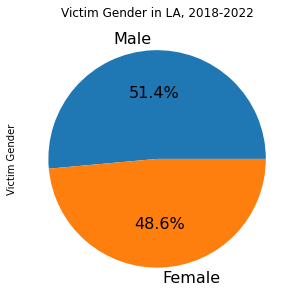

In [29]:
#Group the data by victim gender and count the number of incidents
gender_counts = la_df['Victim Gender'].value_counts()
 #Add a title to the chart
# Create a pie chart of the gender counts
gender_counts.plot.pie(autopct='%1.1f%%', figsize=(5,5), fontsize=16)

# Add a title to the chart
plt.title('Victim Gender in LA, 2018-2022')

# Show the chart
plt.show()

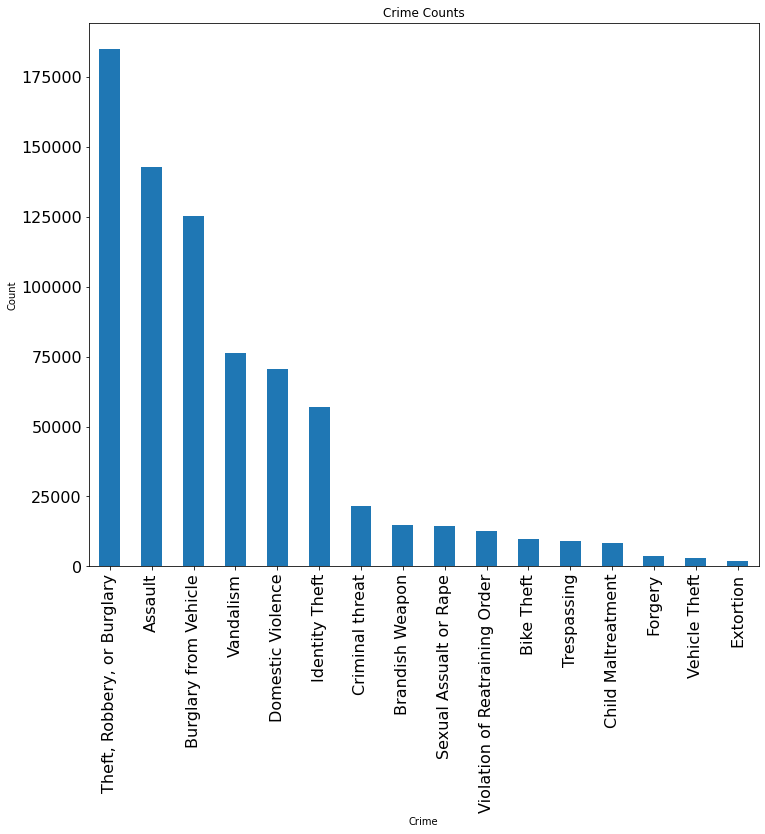

In [30]:
# Get the count of each unique value in the Crime column
crime_counts = la_df['Crime'].value_counts()

# Create a bar chart of the crime counts
crime_counts.plot(kind='bar', figsize=(12,10), fontsize=16)

# Add a title to the chart
plt.title('Crime Counts')

# Add labels to the x and y axes
plt.xlabel('Crime')
plt.ylabel('Count')

# Show the chart
plt.show()







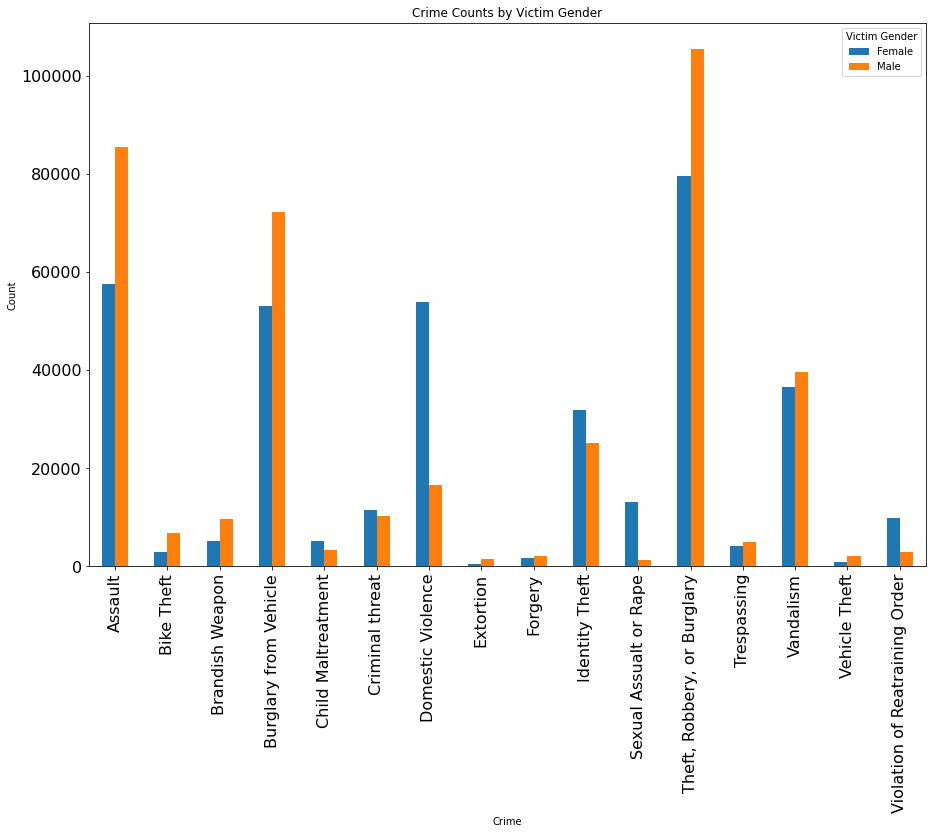

In [31]:
# Group the data by crime and victim gender and count the number of incidents
crime_gender_counts = la_df.groupby(['Crime', 'Victim Gender'])['Crime'].count().unstack()

# Create a grouped bar chart of the crime counts by victim gender
crime_gender_counts.plot(kind='bar', figsize=(15,10), fontsize=16)

# Add a title to the chart
plt.title('Crime Counts by Victim Gender')

# Add labels to the x and y axes
plt.xlabel('Crime')
plt.ylabel('Count')

# Show the chart
plt.show()



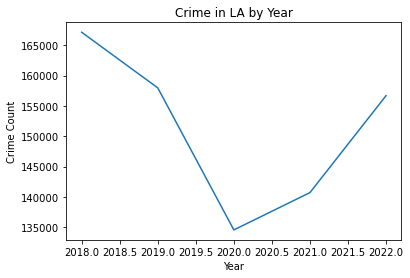

In [32]:
# Convert the Year column to a datetime object
la_df['Year'] = pd.to_datetime(la_df['Year'], format='%Y')

# Create a new dataframe grouped by year
crime_by_year = la_df.groupby([la_df['Year'].dt.year]).size().reset_index(name='Count')

# Create a line plot of crime by year
plt.plot(crime_by_year['Year'], crime_by_year['Count'])

# Add a title and axis labels
plt.title('Crime in LA by Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')

# Show the plot
plt.show()


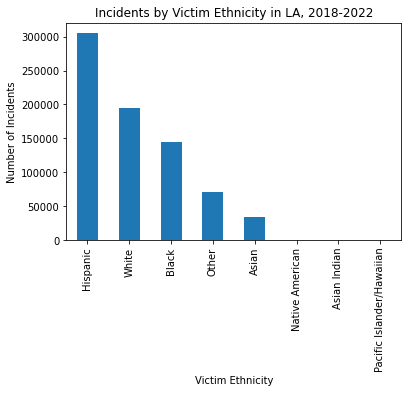

In [33]:
# Count the number of incidents for each Victim Ethnicity
ethnicity_counts = la_df['Victim Ethnicity'].value_counts()

# Create a bar plot of the ethnicity counts
ethnicity_counts.plot.bar()

# Add a title and labels to the plot
plt.title('Incidents by Victim Ethnicity in LA, 2018-2022')
plt.xlabel('Victim Ethnicity')
plt.ylabel('Number of Incidents')

# Show the plot
plt.show()

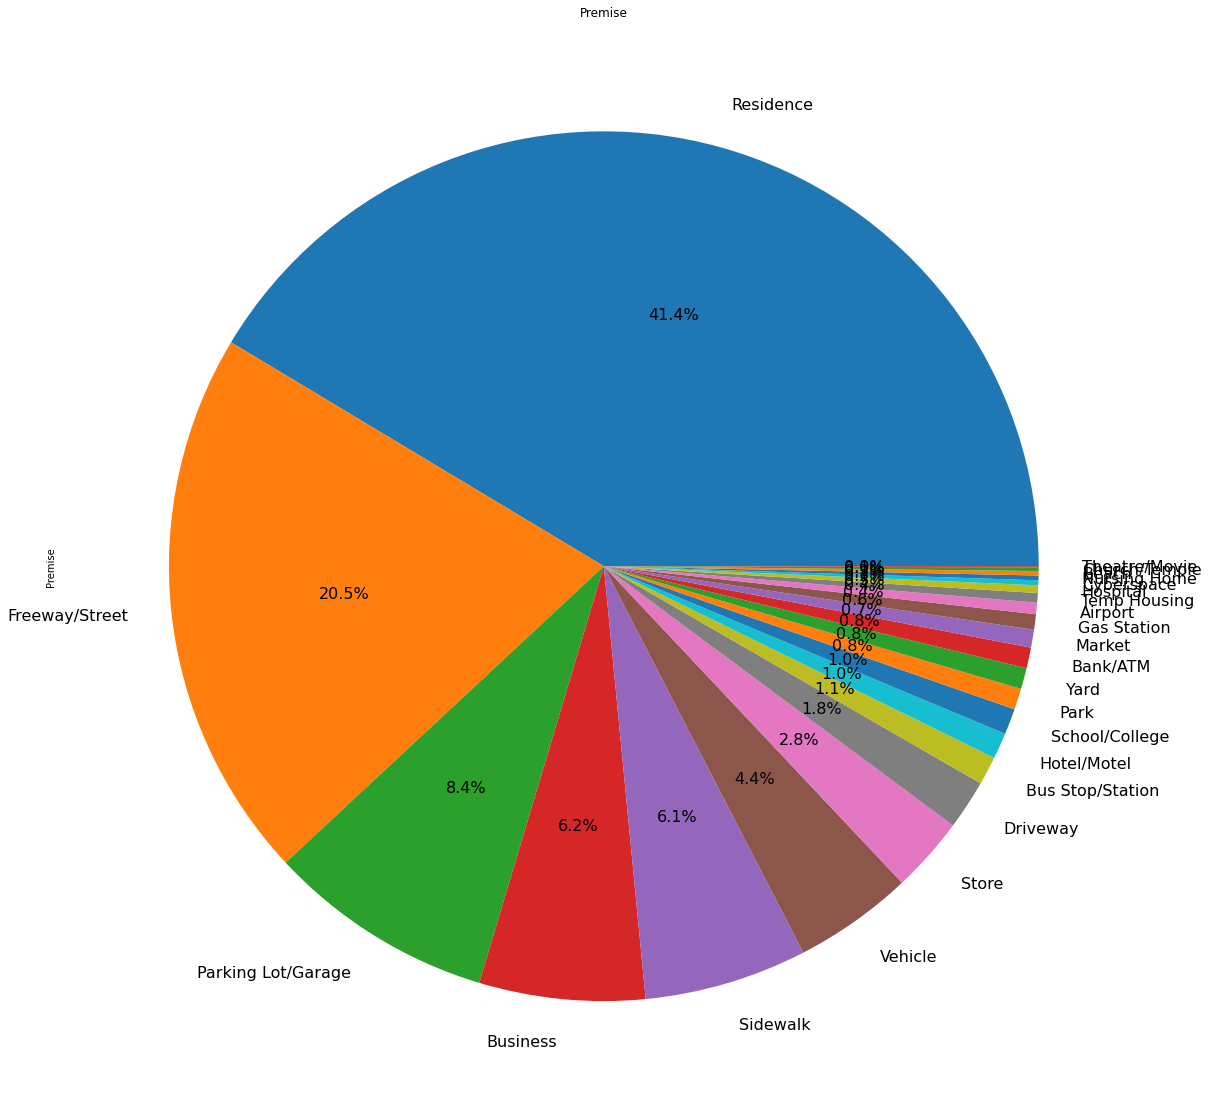

In [34]:
# Get the premise counts
premise_counts = la_df['Premise'].value_counts()

# Calculate the percentage of each value
premise_percentages = premise_counts / premise_counts.sum() * 100

# Filter out values less than 1%
premise_percentages = premise_percentages[premise_percentages >= 2]

# Create a pie chart of the premise counts
premise_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(20,20), fontsize=16)

# Add a title to the chart
plt.title('Premise')

# Show the chart
plt.show()

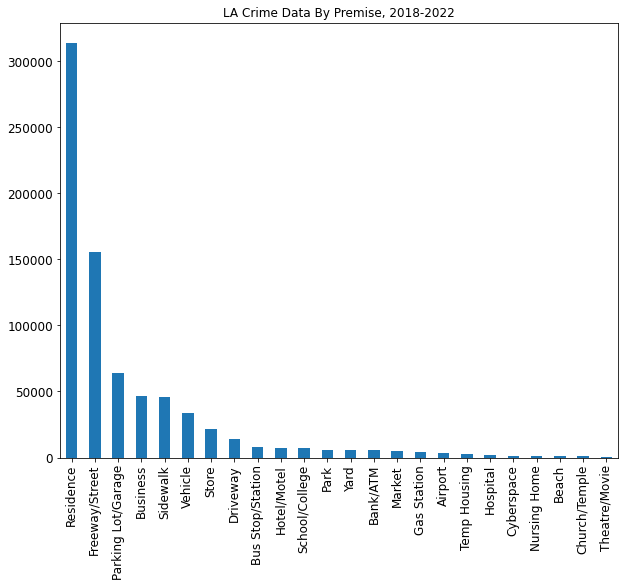

In [45]:
# Get the premise counts
premise_counts = la_df['Premise'].value_counts()

# Calculate the percentage of each value
premise_percentages = premise_counts / premise_counts.sum() * 100

# Filter out values less than 2%
premise_percentages = premise_percentages[premise_percentages >= 2]

# Create a horizontal bar chart of the premise counts
premise_counts.plot(kind='bar', figsize=(10,8), fontsize=12)

# Add a title to the chart
plt.title('LA Crime Data By Premise, 2018-2022')

# Show the chart
plt.show()


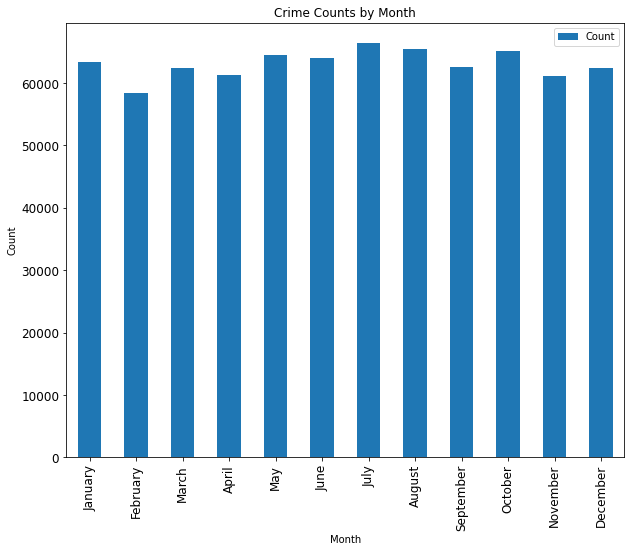

In [46]:
# Create a new column for Month Name
# Create a new dataframe grouped by month name
crime_by_month = la_df.groupby(['Month Name']).size().reset_index(name='Count')

# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the Month Name column to categorical data type with the specified order
crime_by_month['Month Name'] = pd.Categorical(crime_by_month['Month Name'], categories=months_order, ordered=True)

# Sort the dataframe by the month order
crime_by_month = crime_by_month.sort_values('Month Name')

# Create a bar chart of the crime counts by month
crime_by_month.plot(kind='bar', x='Month Name', y='Count', figsize=(10,8), fontsize=12)

# Add a title to the chart
plt.title('Crime Counts by Month')

# Add labels to the x and y axes
plt.xlabel('Month')
plt.ylabel('Count')

# Show the chart
plt.show()



In [38]:
#renaming columns
la_crime = la_crime.rename(columns={
    'DR_NO': "Incident Code", 'AREA': "Area Code", 'AREA NAME': "Area Name", 'Crm Cd': 'Crime Code', 
    'Premis Cd': "Premise Code", 'LAT': "lat", 'LON': 'lon'})
la_crime.columns

Index(['Incident Code', 'DATE OCC', 'Area Code', 'Area Name', 'Crime Code',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premise Code',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'lat', 'lon', 'date',
       'Crime', 'Premise', 'Victim Ethnicity', 'Victim Gender', 'Victim Age',
       'Year', 'Month', 'Month Name'],
      dtype='object')

In [39]:
#renaming columns
la_crime = la_crime.rename(columns={'Age Catg': 'Victim Age'})
la_crime.columns

Index(['Incident Code', 'DATE OCC', 'Area Code', 'Area Name', 'Crime Code',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premise Code',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'lat', 'lon', 'date',
       'Crime', 'Premise', 'Victim Ethnicity', 'Victim Gender', 'Victim Age',
       'Year', 'Month', 'Month Name'],
      dtype='object')

### Creating tables for database

In [40]:
# main table
la_crime_table = la_crime[['Incident Code', 'Year', 'Month', 'Month Name', 
                           'Victim Age', 'Victim Ethnicity', 'Victim Gender','lat', 'lon',
                          'Area Code', 'Crime Code', 'Premise Code']]
la_crime_table.shape

(757078, 12)

In [41]:
# area table
la_area_table = la_crime[['Area Code', 'Area Name']].groupby('Area Name').count().reset_index()
la_area_table

,Area Name,Area Code
0,77th Street,50288
1,Central,50683
2,Devonshire,29014
3,Foothill,25786
4,Harbor,28587
5,Hollenbeck,26130
6,Hollywood,40433
7,Mission,32380
8,N Hollywood,36466
9,Newton,35089


In [43]:
# crime type table
la_crime_type_table = la_crime[['Crime Code', 'Crime']].groupby("Crime").count().reset_index()
la_crime_type_table

,Crime,Crime Code
0,Assault,142935
1,Bike Theft,9903
2,Brandish Weapon,14836
3,Burglary from Vehicle,125150
4,Child Maltreatment,8477
5,Criminal threat,21777
6,Domestic Violence,70447
7,Extortion,1974
8,Forgery,3774
9,Identity Theft,57070


In [ ]:
# premise table
la_premise_table = la_crime[['Premise Code', 'Premise']].groupby('Premise').count().reset_index()
la_premise_table 

### Creating SQLite database

In [ ]:
import sqlite3

conn = sqlite3.connect('LA_crime_database.db')
#
conn.execute('''CREATE TABLE IF NOT EXISTS crime_table
(id INTEGER PRIMARY KEY,
area_id INTEGER,
crime_type_id INTEGER,
premise_id INTEGER,
date TEXT,
time TEXT,
weapon_used TEXT,
domestic INTEGER,
FOREIGN KEY (area_id) REFERENCES area_table(id),
FOREIGN KEY (crime_type_id) REFERENCES crime_type_table(id),
FOREIGN KEY (premise_id) REFERENCES premise_table(id));''')
#
la_crime_table.to_sql('crime_table', conn, if_exists='append', index=False)
#
conn.execute('''CREATE TABLE IF NOT EXISTS area_table
(id INTEGER PRIMARY KEY,
area_name TEXT);''')
#
la_area_table.to_sql('area_table', conn, if_exists='append', index=False)
#
conn.execute('''CREATE TABLE IF NOT EXISTS crime_type_table
(id INTEGER PRIMARY KEY,
crime_type TEXT);''')
#
la_crime_type_table.to_sql('crime_type_table', conn, if_exists='append', index=False)

conn.execute('''CREATE TABLE IF NOT EXISTS premise_table
(id INTEGER PRIMARY KEY,
premise_type TEXT);''')
#
la_premise_table.to_sql('premise_table', conn, if_exists='append', index=False)





In [ ]:
import sqlite3
conn = sqlite3.connect('LA_crime_database.db')
la_crime_table.to_sql('crime_table', conn, if_exists='replace', index=False)
la_area_table.to_sql('area_table', conn, if_exists='replace', index=False)
la_crime_type_table.to_sql('crime_type_table', conn, if_exists='replace', index=False)
la_premise_table.to_sql('premise_table', conn, if_exists='replace', index=False)